In [ ]:
print("hello world")

hello world


# Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, roc_curve, auc



# Data

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/datasets/ibm_edunet/employee_burnout_analysis.xlsx")

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
len(data)

22750

In [ ]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


# Exploratory Data Analysis



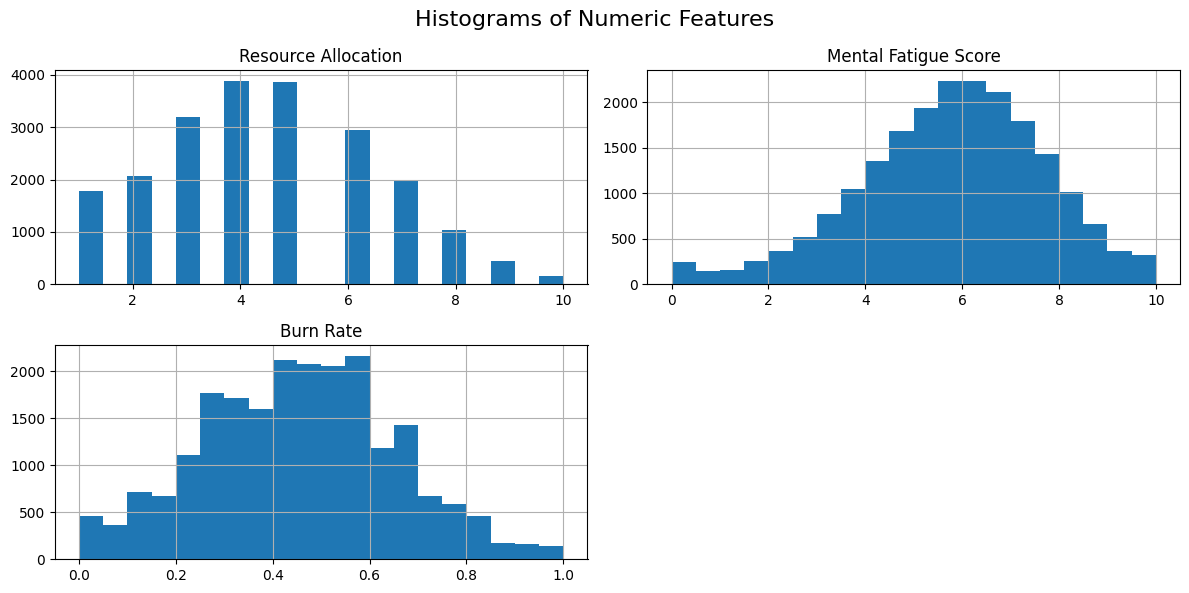

In [ ]:
numeric_features = ['Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']

data[numeric_features].hist(bins=20, figsize=(12, 6))
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

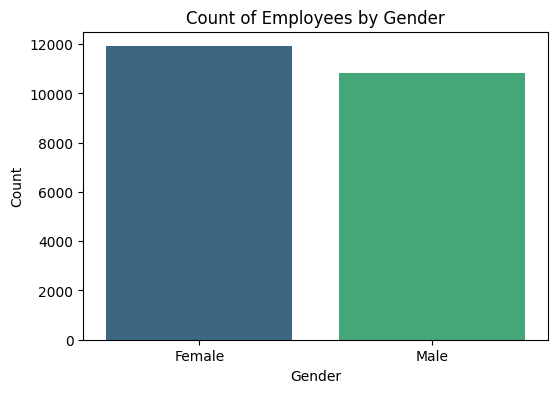

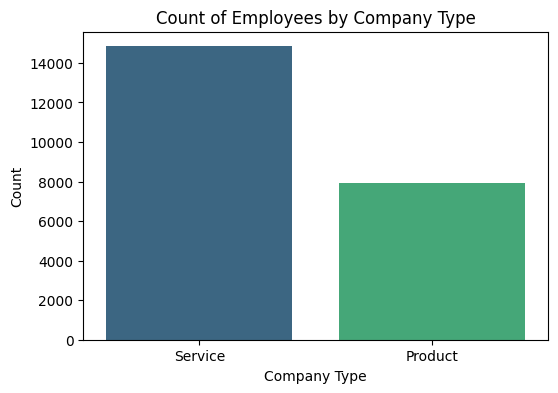

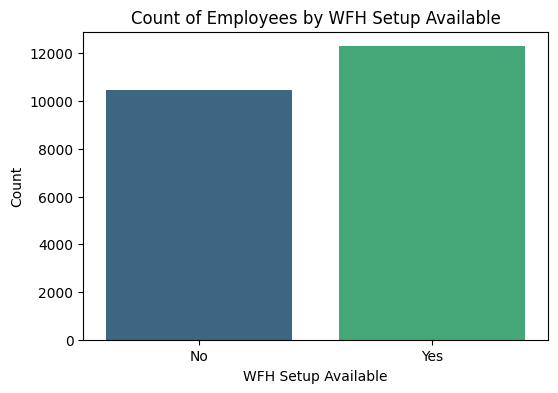

In [ ]:
categorical_features = ['Gender', 'Company Type', 'WFH Setup Available']

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(f'Count of Employees by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

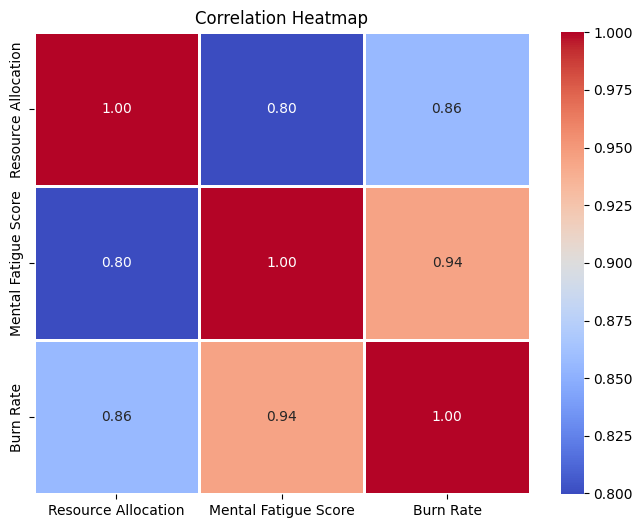

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing

In [ ]:
data = data.drop(["Employee ID", "Date of Joining"], axis=1)

In [ ]:
data.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,Female,Service,No,2,3.0,3.8,0.16
1,Male,Service,Yes,1,2.0,5.0,0.36
2,Female,Product,Yes,2,NaN,5.8,0.49
3,Male,Service,Yes,1,1.0,2.6,0.20
4,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
x = data.drop(["Burn Rate"], axis=1)
y = data["Burn Rate"]

In [ ]:
x.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,Female,Service,No,2,3.0,3.8
1,Male,Service,Yes,1,2.0,5.0
2,Female,Product,Yes,2,NaN,5.8
3,Male,Service,Yes,1,1.0,2.6
4,Female,Service,No,3,7.0,6.9


In [ ]:
x.isna().sum()

Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [ ]:
imputer_strategies = [("mean", SimpleImputer(strategy="mean"), [4]), ("most_frequent", SimpleImputer(strategy="most_frequent"), [5])]

In [ ]:
transformer = ColumnTransformer(transformers=imputer_strategies, remainder="passthrough")

In [ ]:
x = transformer.fit_transform(x)

In [ ]:
x = pd.DataFrame(x, columns=["Resource Allocation", "Mental Fatigue Score", "Gender", "Company Type", "WFH Setup Available", "Designation"])

In [ ]:
x.head()

,Resource Allocation,Mental Fatigue Score,Gender,Company Type,WFH Setup Available,Designation
0,3.0,3.8,Female,Service,No,2
1,2.0,5.0,Male,Service,Yes,1
2,4.481398,5.8,Female,Product,Yes,2
3,1.0,2.6,Male,Service,Yes,1
4,7.0,6.9,Female,Service,No,3


In [ ]:
x.isna().sum()

Resource Allocation     0
Mental Fatigue Score    0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
dtype: int64

In [ ]:
y.isna().sum()

1124

In [ ]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [ ]:
mean_val = y.mean()

In [ ]:
y = y.fillna(mean_val)

In [ ]:
y.isna().sum()

0

In [ ]:
x_cols = x.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
categorical_columns = ["Gender", "Company Type", "WFH Setup Available"]

In [ ]:
for i in categorical_columns:
  x[i] = le.fit_transform(x[i])

In [ ]:
x.head()

,Resource Allocation,Mental Fatigue Score,Gender,Company Type,WFH Setup Available,Designation
0,3.0,3.8,0,1,0,2
1,2.0,5.0,1,1,1,1
2,4.481398,5.8,0,0,1,2
3,1.0,2.6,1,1,1,1
4,7.0,6.9,0,1,0,3


In [ ]:
x.describe()

,Gender,Company Type,WFH Setup Available
count,22750.000000,22750.000000,22750.000000
mean,0.476571,0.652000,0.540220
std,0.499462,0.476346,0.498391
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
x_train

,Resource Allocation,Mental Fatigue Score,Gender,Company Type,WFH Setup Available,Designation
9736,5.0,5.0,1,1,1,2
21248,6.0,6.7,1,1,0,3
7406,4.0,5.2,1,1,0,2
4908,6.0,7.2,1,0,1,3
20715,4.0,4.0,0,1,1,2
...,...,...,...,...,...,...
5520,1.0,0.5,0,0,0,1
3046,4.481398,5.0,0,1,1,2
20463,3.0,2.8,0,1,1,1
18638,5.0,7.1,0,0,0,2


# Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

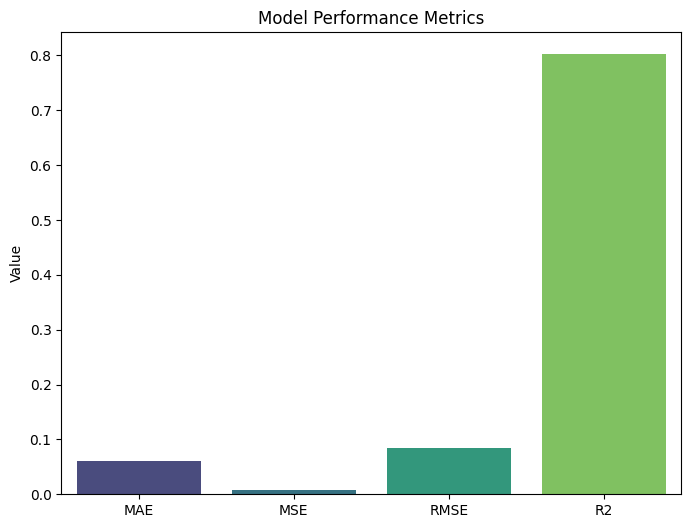

In [ ]:
plt.figure(figsize=(8, 6))
metrics = ['MAE', 'MSE', 'RMSE', 'R2']
values = [mae, mse, rmse, r2]
sns.barplot(x=metrics, y=values, palette='viridis')
plt.title('Model Performance Metrics')
plt.ylabel('Value')
plt.show()


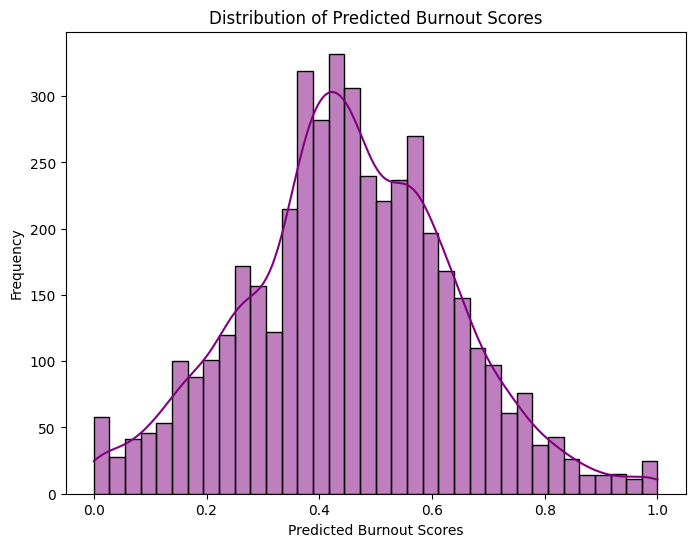

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='purple')
plt.title('Distribution of Predicted Burnout Scores')
plt.xlabel('Predicted Burnout Scores')
plt.ylabel('Frequency')
plt.show()

# Results

In [ ]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 0.060660005789347306
Mean Squared Error: 0.0072647828930514375
Root Mean Squared Error: 0.08523369576084001
R2 Score: 0.8020007691130879
